# **Simple RAG Diagram**

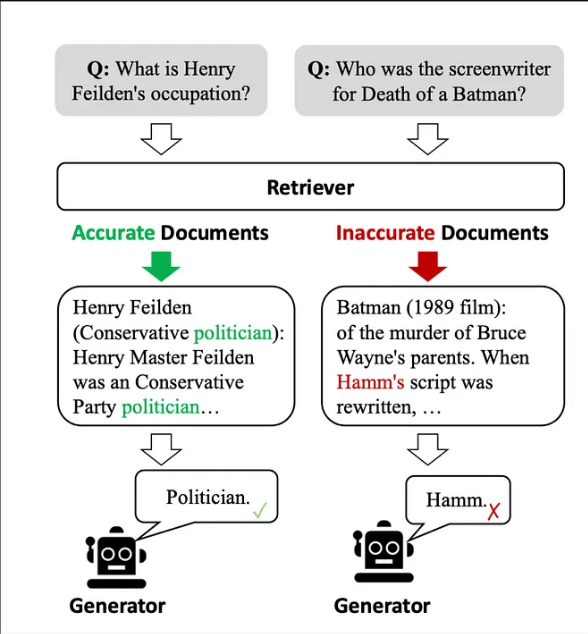

# **Simple RAG Implementation**

In [ ]:
!pip install transformers sentence-transformers
!pip install groq

In [ ]:
import os
from sentence_transformers import SentenceTransformer, util
from groq import Groq

# Initialize the retriever and Groq client
retriever = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
client = Groq(api_key="Your API Key here")

# Sample knowledge base (documents)
documents = [
    "Retrieval-Augmented Generation (RAG) is an AI framework that combines the strengths of retrieval-based and generative models.",
    "The main components of a RAG system are the retriever and the generator.",
    "A key benefit of Retrieval-Augmented Generation is that it can produce more accurate responses compared to standalone generative models.",
    "The retrieval process in a RAG system often relies on embedding-based models, like Sentence-BERT or DPR.",
    "Common use cases of RAG include chatbots, customer support systems, and knowledge retrieval for business intelligence."
]

# Embed documents for retrieval
document_embeddings = retriever.encode(documents, convert_to_tensor=True)

# Function to retrieve top relevant document
def retrieve(query, top_k=1):
    query_embedding = retriever.encode(query, convert_to_tensor=True)
    hits = util.semantic_search(query_embedding, document_embeddings, top_k=top_k)
    top_docs = [documents[hit['corpus_id']] for hit in hits[0]]
    return top_docs[0] if hits[0] else None

# Function to generate response using Groq
def generate_response(query, context):
    response = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": f"Context: {context} Question: {query} Answer:"
            }
        ],
        # model="llama3-8b-8192"
        model="gemma2-9b-it"
    )
    return response.choices[0].message.content

# Main function to handle question-answering
def ask_question(query):
    retrieved_context = retrieve(query)
    if retrieved_context:
        response = generate_response(query, retrieved_context)
    else:
        response = "I have no knowledge about this topic."
    return response

# Test questions
questions = [
    "What is Retrieval-Augmented Generation (RAG)?",
    "What are the main components of a RAG system?",
    "Who was the screenwriter for Death of Batman?",  # Irrelevant question
]

# Ask each question and print the result
for question in questions:
    print(f"Question: {question}")
    answer = ask_question(question)
    print(f"Answer: {answer}\n{'-'*50}\n")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Question: What is Retrieval-Augmented Generation (RAG)?
Answer: Retrieval-Augmented Generation (RAG) is an AI framework that blends the power of **retrieval models** and **generative models** to enhance the capabilities of text generation. 

Think of it like this:

* **Retrieval models** are great at finding relevant information from a massive dataset (like a library). They can quickly pinpoint documents or passages that contain the information needed to answer a question or complete a task.
* **Generative models** are excellent at creating new text, like writing stories, summarizing information, or translating languages. 

**RAG combines these two strengths:**

1. **Retrieval:** When given a prompt or question, a RAG system first uses a retrieval model to find the most relevant information from its knowledge base. 
2. **Augmentation:** This retrieved information is then "augmented" and fed to a generative model, which uses it as context to generate a more accurate, relevant, and infor

# With Streamlit


In [ ]:
pip install streamlit pypdf2 sentence-transformers groq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 7.0 MB/s eta 0:00:00


In [ ]:
import os
import streamlit as st
from sentence_transformers import SentenceTransformer, util
from groq import Groq
from PyPDF2 import PdfReader

# Initialize the retriever and Groq client
retriever = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
client = Groq(api_key="Your API Key here")

# Knowledge base (documents) and embeddings
documents = [
    "Retrieval-Augmented Generation (RAG) is an AI framework that combines the strengths of retrieval-based and generative models.",
    "The main components of a RAG system are the retriever and the generator.",
    "A key benefit of Retrieval-Augmented Generation is that it can produce more accurate responses compared to standalone generative models.",
    "The retrieval process in a RAG system often relies on embedding-based models, like Sentence-BERT or DPR.",
    "Common use cases of RAG include chatbots, customer support systems, and knowledge retrieval for business intelligence."
]
document_embeddings = retriever.encode(documents, convert_to_tensor=True)

# Function to retrieve top relevant document
def retrieve(query, top_k=1):
    query_embedding = retriever.encode(query, convert_to_tensor=True)
    hits = util.semantic_search(query_embedding, document_embeddings, top_k=top_k)
    top_docs = [documents[hit['corpus_id']] for hit in hits[0]]
    return top_docs[0] if hits[0] else None

# Function to generate response using Groq
def generate_response(query, context):
    response = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": f"Context: {context} Question: {query} Answer:"
            }
        ],
        model="gemma2-9b-it"
    )
    return response.choices[0].message.content

# Function to handle PDF upload and text extraction
def extract_text_from_pdf(file):
    pdf_reader = PdfReader(file)
    text = ""
    for page in pdf_reader.pages:
        text += page.extract_text()
    return text

# Function to update knowledge base with new content from PDF
def update_knowledge_base(pdf_text):
    global documents, document_embeddings
    documents.append(pdf_text)
    document_embeddings = retriever.encode(documents, convert_to_tensor=True)

# Streamlit app layout
st.title("RAG-based Question Answering App")
st.write("Upload a PDF, ask questions based on its content, and get answers!")

# Upload PDF file
uploaded_file = st.file_uploader("Upload a PDF file", type="pdf")
if uploaded_file:
    pdf_text = extract_text_from_pdf(uploaded_file)
    update_knowledge_base(pdf_text)
    st.write("PDF content successfully added to the knowledge base.")

# Question input
question = st.text_input("Enter your question:")
if question:
    retrieved_context = retrieve(question)
    if retrieved_context:
        answer = generate_response(question, retrieved_context)
    else:
        answer = "I have no knowledge about this topic."
    st.write("Answer:", answer)


2024-10-26 15:22:14.055 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-26 15:22:14.359 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-10-26 15:22:14.365 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-26 15:22:14.372 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-26 15:22:14.376 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-26 15:22:14.379 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-26 15:22:14.381 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-26 15:22:14.384 Thread 'MainThread': mi

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.142.168.124


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.142.168.124:8501

Need to install the following packages:
  localtunnel@2.0.2
Ok to proceed? (y) y
your url is: https://modern-dragons-look.loca.lt
2024-10-26 15:24:17.524520: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-26 15:24:17.567173: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-26 15:24:17.580743: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-26 15:24:19.386005: W tensorflow/compiler/tf2tenso

# **Corrective RAG**

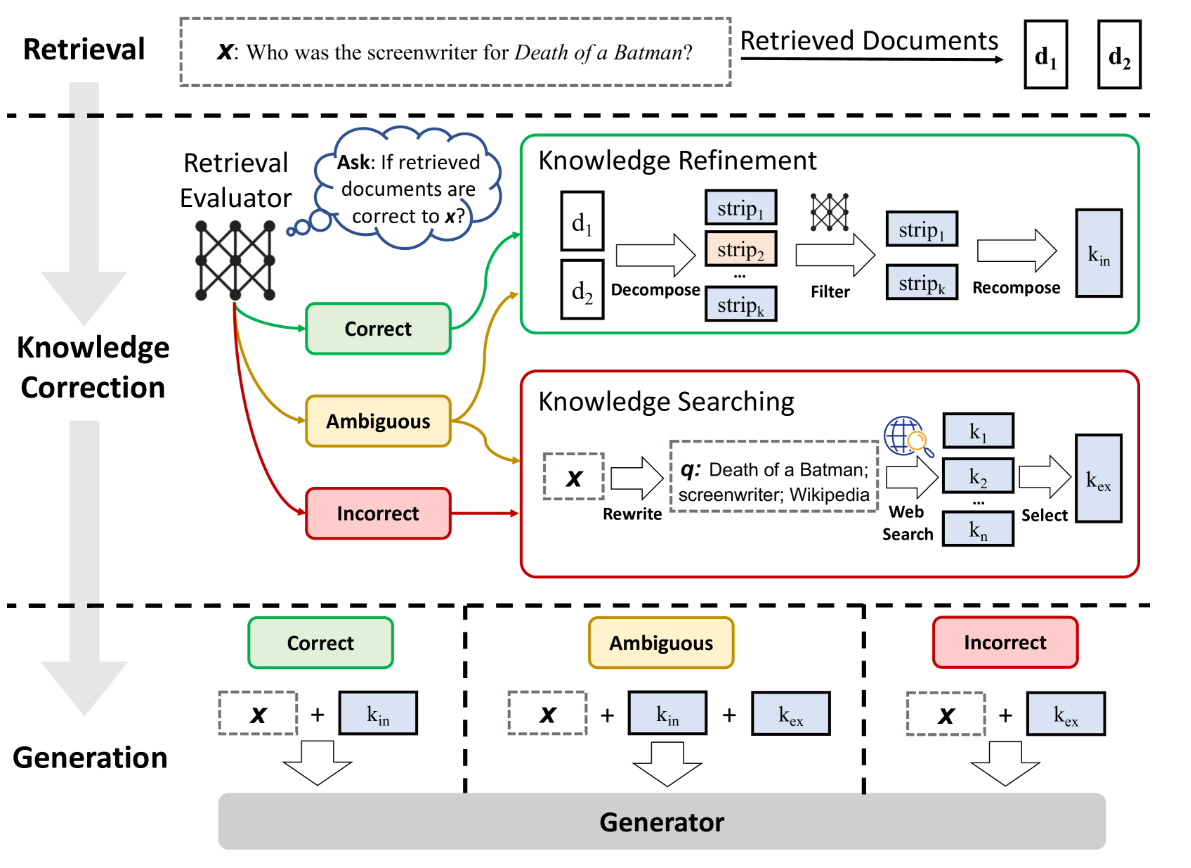

In [ ]:
!pip install transformers sentence-transformers groq google-search-results

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.2 MB/s eta 0:00:00
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32009 sha256=2cdc25a4ba21ed6e40f43928a4054c425599cd2747d87f3562fa8a0ef187cc3a
  Stored in directory: /root/.cache/pip/wheels/d3/b2/c3/03302d12bb44a2cdff3c9371f31b72c0c4e84b8d2285eeac53
Successfully built google-search-results


In [ ]:
import os
from sentence_transformers import SentenceTransformer, util
from groq import Groq
from googlesearch import search  # Used for external internet search

# Initialize the retriever and Groq client
retriever = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
client = Groq(api_key="Your API Key here")

# Sample knowledge base (internal documents)
documents = [
    "Retrieval-Augmented Generation (RAG) is an AI framework that combines the strengths of retrieval-based and generative models.",
    "The main components of a RAG system are the retriever and the generator.",
    "A key benefit of Retrieval-Augmented Generation is that it can produce more accurate responses compared to standalone generative models.",
    "The retrieval process in a RAG system often relies on embedding-based models, like Sentence-BERT or DPR.",
    "Common use cases of RAG include chatbots, customer support systems, and knowledge retrieval for business intelligence."
]

# Embed internal documents for retrieval
document_embeddings = retriever.encode(documents, convert_to_tensor=True)

# Step 1: Internal Retrieval
def retrieve_internal(query, top_k=1):
    query_embedding = retriever.encode(query, convert_to_tensor=True)
    hits = util.semantic_search(query_embedding, document_embeddings, top_k=top_k)
    top_docs = [documents[hit['corpus_id']] for hit in hits[0]]
    return top_docs[0] if hits[0] else None

# Step 2: External Retrieval (Internet Search)
def retrieve_external(query, num_results=1):
    search_results = []
    for result in search(query, num_results=num_results):
        search_results.append(result)
    return search_results[0] if search_results else None

# Step 3: Corrective Retrieval Process
def corrective_retrieval(query):
    # First try to retrieve internally
    internal_result = retrieve_internal(query)

    if internal_result:
        # Found relevant info in internal database
        context = internal_result
        source = "internal"
    else:
        # If no relevant info, go to external retrieval
        external_result = retrieve_external(query)
        if external_result:
            context = external_result
            source = "external"
        else:
            # No knowledge found internally or externally
            context = None
            source = None

    return context, source

# Step 4: Generate response using Groq
def generate_response(query, context, source):
    if not context:
        return "I have no knowledge about this topic."

    if source == "internal":
        prompt = f"Understand this Knowledge well: {context} Here is the Question: {query} Answer according to the above knowledge: Answer:"
    elif source == "external":
        prompt = f"Understand this Knowledge well: {context} Here is the Question: {query} Answer according to the above knowledge: Answer:"

    response = client.chat.completions.create(
        messages=[{"role": "user", "content": prompt}],
        # model="llama3-8b-8192"
        model="gemma2-9b-it"
    )
    return response.choices[0].message.content

# Main function to handle question-answering with Corrective RAG
def ask_question(query):
    context, source = corrective_retrieval(query)
    response = generate_response(query, context, source)
    return response

# Test questions
questions = [
    "What is Retrieval-Augmented Generation (RAG)?",
    "What are the main components of a RAG system?",
    "Who was the screenwriter for Death of a Batman?",  # Likely to go to external retrieval
]

# Ask each question and print the result
for question in questions:
    print(f"Question: {question}")
    answer = ask_question(question)
    print(f"Answer: {answer}\n{'-'*50}\n")


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Question: What is Retrieval-Augmented Generation (RAG)?
Answer: Retrieval-Augmented Generation (RAG) is an AI framework that brings together the power of retrieval-based models and generative models.  

--------------------------------------------------

Question: What are the main components of a RAG system?
Answer: The main components of a RAG system are the **retriever** and the **generator**. 

--------------------------------------------------

Question: Who was the screenwriter for Death of a Batman?
Answer: The provided knowledge focuses on how embedding-based models are used in RAG (Retrieval Augmented Generation) systems for question answering.  

It **does not** contain information about movies or their screenwriters. Therefore, I cannot answer who wrote the screenplay for "Death of a Batman" based on the given knowledge. 


To find that information, you would need to consult a movie database or other source of film information. 

---------------------------------------------